## Exercise 5

<br>

1) Read the attached file "bank.csv" in the CSV file using pandas. Pay attention to the file delimeter.

Inspect the resulting dataframe with respect to the column names and the variable types.

2) Pick data from the following columns to a second dataframe `df2`: `y`, `job`, `marital`, `default`, `housing`, `poutcome`.

3) Convert categorical variables to dummy numerical values using the command

`df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])`

4) Produce a heat map of correlation coefficients for all variables in `df3`. Describe the amount of correlation between the variables in your own words.

5) Select the column called `y` of `df3` as the target variable `y`, and all the remaining columns for the explanatory variables `X`.

6) Split the dataset into training and testing sets with 75/25  ratio.

7) Setup a logistic regression model, train it with training data and predict on testing data.

8) Print the confusion matrix (or use heat map if you want) and accuracy score for the logistic regression model.


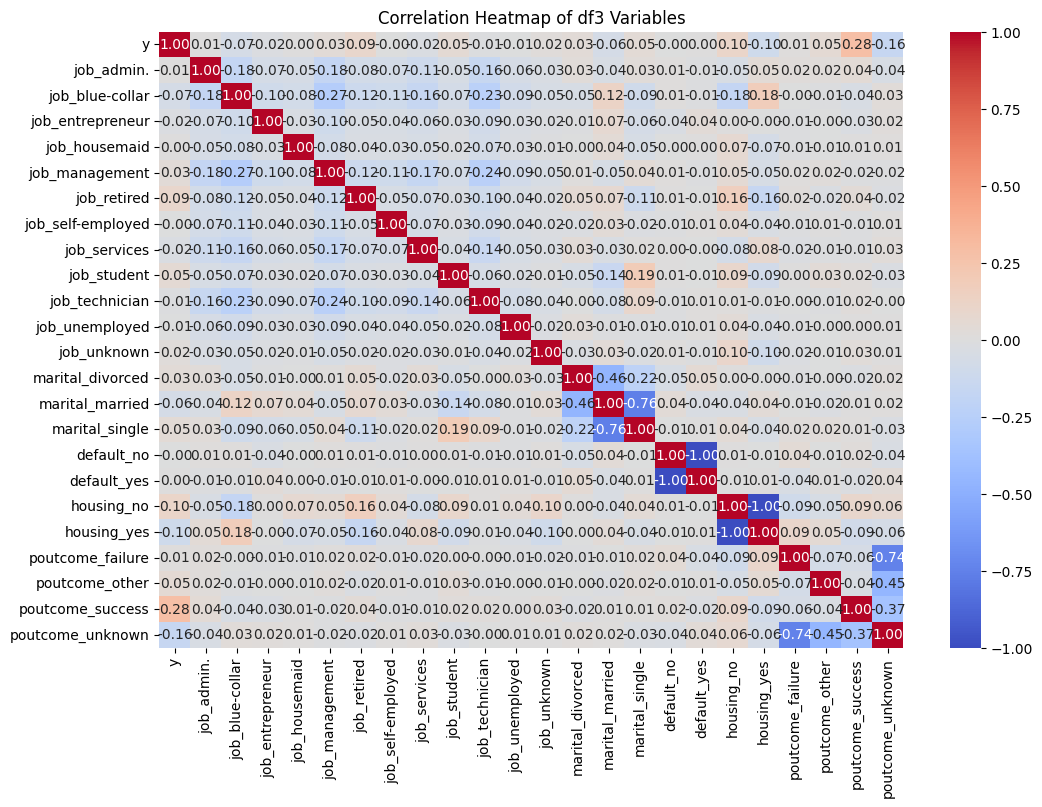

Confusion Matrix:
[[997   9]
 [106  19]]

Accuracy Score: 0.8983200707338639


In [2]:
import pandas as pd

# Step 1: Read the CSV file
df = pd.read_csv("bank.csv", delimiter=";")

# Step 2: Pick specific columns to a second dataframe df2
df2 = df[['y', 'job', 'marital', 'default', 'housing', 'poutcome']]

# Step 3: Convert categorical variables to dummy numerical values
df3 = pd.get_dummies(df2, columns=['job', 'marital', 'default', 'housing', 'poutcome'])

# Step 4: Convert categorical variables to numerical values using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df3['y'] = label_encoder.fit_transform(df3['y'])

# Step 4 (continued): Produce a heat map of correlation coefficients
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of df3 Variables")
plt.show()

# Step 5: Select target variable y and explanatory variables X
y = df3['y']
X = df3.drop(columns=['y'])

# Step 6: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 7: Setup a logistic regression model, train it, and predict on testing data
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Step 8: Print confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)
